In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import gradient_descent_v2 
import cv2

In [ ]:
!wget https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip

--2022-04-13 11:12:24--  https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip [following]
--2022-04-13 11:12:25--  https://www.dropbox.com/s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc522c023615102747e33d2c3dd6.dl.dropboxusercontent.com/cd/0/inline/BjUDeZCTL25DxKes54hLfPyUUuEa-q39X20wq64qWwewapNHXMh1Mh8Ewv-gZfOFF_dp1Ra2xYfOklkmJn_ry0SK1Y4cputa7rag1SlprCrlk3yU7vjYnkcUeH2se8WCcFVa7O97NVhwCmDrbqasZmz6VwfYUAC2jK6wJ3mH3ZjIFQ/file# [following]
--2022-04-13 11:12:25--  https://uc522c023615102747e33d2c3dd6.dl.dropboxusercontent.com/cd/0/inline/BjUDeZCTL25

In [ ]:
!unzip 28577_36420_bundle_archive.zip

Archive:  28577_36420_bundle_archive.zip
  inflating: fer2013.csv             


In [ ]:
x_train, y_train, x_test, y_test = [], [], [], []

In [ ]:
df = pd.read_csv('/content/fer2013.csv')

In [ ]:
for index, row in df.iterrows():
    val = row['pixels'].split(" ")

    try:
      if 'Training' in row['Usage']:
          x_train.append(np.array(val, 'float32'))
          y_train.append(row['emotion'])
      elif 'PublicTest' in row['Usage']:
          x_test.append(np.array(val, 'float32'))
          y_test.append(row['emotion'])
    except:
      print("Error!!! at index - {} and row - {} ".format(index, row))


In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width, height = 48, 48

In [ ]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, num_classes=num_labels)
y_test = to_categorical(y_test, num_classes=num_labels)

In [ ]:
  # normalizing our data 0 and 1

  x_train -= np.mean(x_train, axis=0)
  x_train /= np.std(x_train, axis=0)

  x_test -= np.mean(x_test, axis=0)
  x_test /= np.std(x_test, axis=0)

  x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
  x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

In [ ]:
pip install keras

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(x_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

# 2nd convolution layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

# 3rd convolution layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())

# fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        3

In [ ]:
# compiling the model

model.compile(loss=categorical_crossentropy,
             optimizer='sgd',
             metrics=['accuracy'])

In [ ]:
# training the model 

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/50
449/449 [==============================] - 30s 46ms/step - loss: 1.8325 - accuracy: 0.2570 - val_loss: 1.8118 - val_accuracy: 0.2666
Epoch 2/50
449/449 [==============================] - 20s 44ms/step - loss: 1.6951 - accuracy: 0.3223 - val_loss: 1.6443 - val_accuracy: 0.3622
Epoch 3/50
449/449 [==============================] - 20s 44ms/step - loss: 1.6252 - accuracy: 0.3584 - val_loss: 1.6119 - val_accuracy: 0.3798
Epoch 4/50
449/449 [==============================] - 20s 44ms/step - loss: 1.5644 - accuracy: 0.3873 - val_loss: 1.5796 - val_accuracy: 0.3934
Epoch 5/50
449/449 [==============================] - 20s 44ms/step - loss: 1.5193 - accuracy: 0.4075 - val_loss: 1.5104 - val_accuracy: 0.4179
Epoch 6/50
449/449 [==============================] - 20s 45ms/step - loss: 1.4770 - accuracy: 0.4275 - val_loss: 1.4826 - val_accuracy: 0.4316
Epoch 7/50
449/449 [==============================] - 20s 45ms/step - loss: 1.4429 - accuracy: 0.4405 - val_loss: 1.4262 - val_accuracy:

In [ ]:
model.save('facial_regcognition_model') 

INFO:tensorflow:Assets written to: facial_regcognition_model/assets


In [ ]:
import shutil
shutil.make_archive('facial_regcognition_model', 'zip', 'facial_regcognition_model')

'/content/facial_regcognition_model.zip'

In [ ]:
from google.colab import files
files.download("/content/facial_regcognition_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow import keras 
model = keras.models.load_model("/content/model")
face_haar_cascade = cv2.CascadeClassifier()

OSError: ignored

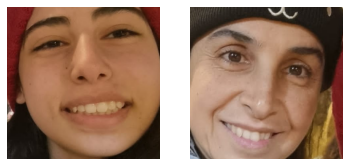

In [ ]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt


def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = 'test.jpg'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)

# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

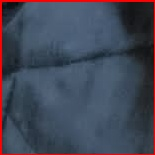

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

test_image = cv2.imread('/content/face.jpg')
cv2_imshow(test_image)

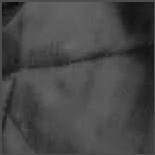

In [ ]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
import numpy as np
import cv2

from keras.preprocessing.image import img_to_array

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)

for x, y, w, h in faces:
    cv2.rectangle(test_image, (x,y), (x+w, y+h), (255,0,0))
    roi_gray = gray_image[y:y + h, x:x + h]
    roi_gray = cv2.resize(roi_gray, (48, 48))
    image_pixels = img_to_array(roi_gray)
    image_pixels = np.expand_dims(image_pixels, axis=0)
    image_pixels /= 255
    predictions = model.predict(image_pixels)
    max_index = np.argmax(predictions[0])
    emotion_detection = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_prediction = emotion_detection[max_index]
    print(emotion_prediction)
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    font_scale = 1
    color = (255, 0, 0)
    thick = 2
    image = cv2.putText(test_image, emotion_prediction, org, font,
                        font_scale, color, thick, cv2.LINE_AA)


NameError: ignored